# Explore invariant data

- These are the variables:

```
'ANOR': 'angle_of_sub_gridscale_orography.nc',
'CVH': 'high_vegetation_cover.nc',
'CVL': 'low_vegetation_cover.nc',
'ISOR': 'anisotropy_of_sub_gridscale_orography.nc',
'LSM': 'land_sea_mask.nc',
'SDFOR': 'standard_deviation_of_filtered_subgrid_orography.nc',
'SDOR': 'standard_deviation_of_orography.nc',
'SLOR': 'slope_of_sub_gridscale_orography.nc',
'TVH': 'type_of_high_vegetation.nc',
'TVL': 'type_of_low_vegetation.nc',
'Z': 'geopotential.nc'
```

## Initial setup

In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
# Load packages.
import sys
import glob

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

from cartopy.io import shapereader
from cartopy import feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import AxesGrid

%matplotlib inline

In [4]:
# My repository.
repository = "/home/alex/Dropbox/repositories/"

# Include once my repository in the path for searching libraries.
if repository not in sys.path:
    sys.path.append(repository)
    
# Import my package.
import cdlearn

# Map borders.
loni, lonf, lati, latf = -90, -30, 20, -60

# Where figures will be put.
fig_path = "/home/alex/Dropbox/repositories/phd/images/"

In [10]:
# First we will use cartopy's shapereader to download (and cache) states shapefile with 50 
# meters resolution from the NaturalEarth.
kw = dict(resolution="50m", category="cultural", name="admin_1_states_provinces")
states_shp = shapereader.natural_earth(**kw)
shp = shapereader.Reader(states_shp)

## Load data

In [5]:
# Variables and their codes.
cdlearn.auxiliary.dict_invariant

{'ANOR': 'angle_of_sub_gridscale_orography.nc',
 'CVH': 'high_vegetation_cover.nc',
 'CVL': 'low_vegetation_cover.nc',
 'ISOR': 'anisotropy_of_sub_gridscale_orography.nc',
 'LSM': 'land_sea_mask.nc',
 'SDFOR': 'standard_deviation_of_filtered_subgrid_orography.nc',
 'SDOR': 'standard_deviation_of_orography.nc',
 'SLOR': 'slope_of_sub_gridscale_orography.nc',
 'TVH': 'type_of_high_vegetation.nc',
 'TVL': 'type_of_low_vegetation.nc',
 'Z': 'geopotential.nc'}

In [6]:
# List with codes.
codes = [k for k in cdlearn.auxiliary.dict_invariant.keys()]

# Grid instance for the whole globe.
grid = cdlearn.pixels.EraInterimGrid()

# Load invariant data to this grid.
grid.load_invariant(var_labels=codes)

## Plot data

In [110]:
# Auxiliar function for plotting invariant data.
def global_map(data_array:xr.DataArray,
               time_index=0,
               fig_size=(12, 6),
               vmin=None,
               vmax=None,
               cmap=plt.cm.gist_rainbow_r,
               title="title",
               cbar_label="data (units)",
               save_fig=False,
               fig_path="./figure.jpg"):
    """
    Make a global map with data on top of it.
    
    Arguments:
    ----------
    data : xarray DataSet or DataArray object 
        Input data.
    time_index : int, optional (default is 0)
        Time index for plotting data at this instant.
    vmin, vmax : None
        Extreme values for colorbar.
    cmap : matplotlib.colors.LinearSegmentedColormap object, optional 
    (default is plt.cm.rainbow_r)
        Color map.
    title : str, optional (default is "title")    
        Title for map.
    cbar_label : str, optional (default is "data (units)")    
        Label for color bar.
    save_fig : bool, optional (default is False)
        Whether to save the figure.   
    fig_path : str, optional (default is "./figure.jpg")    
        Where to save the figure.
        
    Returns:
    -------
    plot : matplotlib.collections.QuadMesh
        Object for plotted data.
    """

    # Make grid object.
    projection = ccrs.PlateCarree()
    axes_class = (GeoAxes, dict(map_projection=projection))
    fig = plt.figure(figsize=fig_size)
    axgr = AxesGrid(fig=fig, 
                    rect=111, 
                    axes_class=axes_class,
                    nrows_ncols=(1, 1),
                    axes_pad=0.02,
                    cbar_location="right",
                    cbar_mode="single",
                    cbar_pad=0.25,
                    cbar_size="3%",
                    label_mode="")

    # Make map.
    for index, axis in enumerate(axgr):
        axis.coastlines()
        axis.add_feature(cfeature.BORDERS)
        axis.set_xticks(np.arange(-180, 180 + 30, 30), crs=projection)
        axis.set_yticks(np.arange(-90, 90 + 30, 30), crs=projection)
        axis.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
        axis.yaxis.set_major_formatter(LatitudeFormatter())
        axis.gridlines(xlocs=range(-180, 180 + 15, 15), ylocs=range(-90, 90 + 15, 15)) 

    # Plot data on this map.
    p = data_array.isel(time=time_index).plot(
        ax=axis,
        vmin=vmin,
        vmax=vmax,
        cmap=cmap,
        add_colorbar=False,
        add_labels=False)
    
    # Labels.
    p.axes.set_xlabel("Longitude")
    p.axes.set_ylabel("Latitude")
    p.axes.set_title(title, weight="bold")
    
    # Fill colorbar.        
    cb = axgr.cbar_axes[0].colorbar(p)
    cb.set_label_text(cbar_label, weight="bold")
     
    # Save figure.
    if save_fig:
        plt.savefig(fig_path, dpi=200, bbox_inches="tight")    
        
    return p    

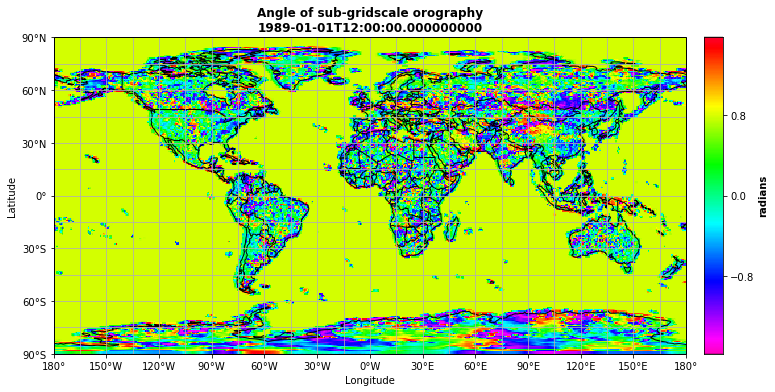

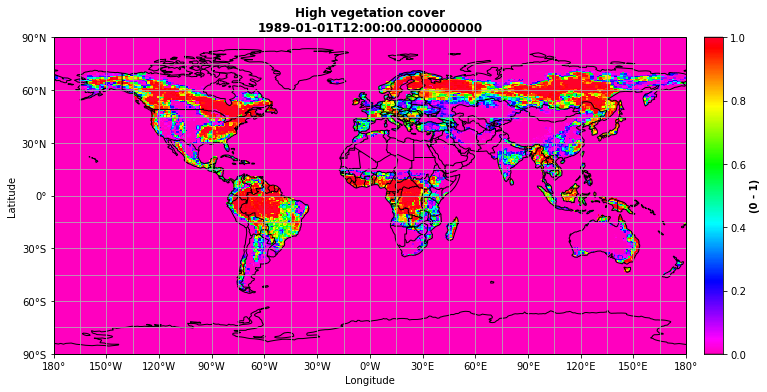

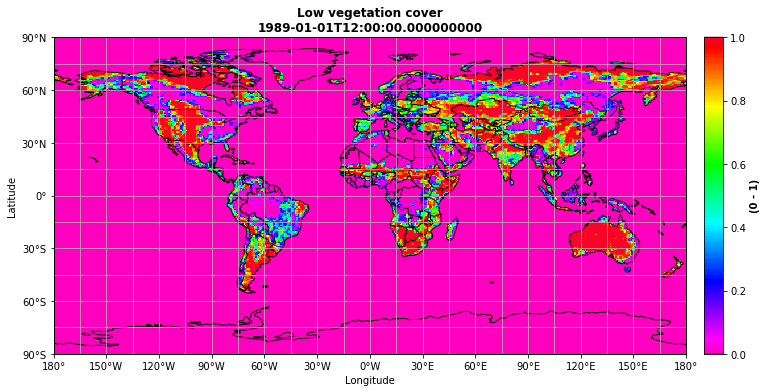

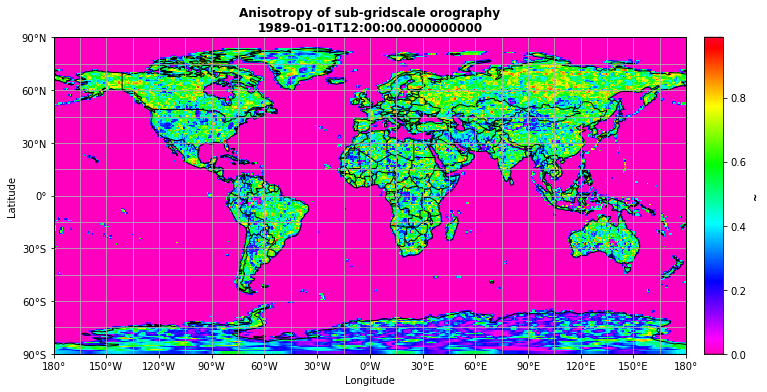

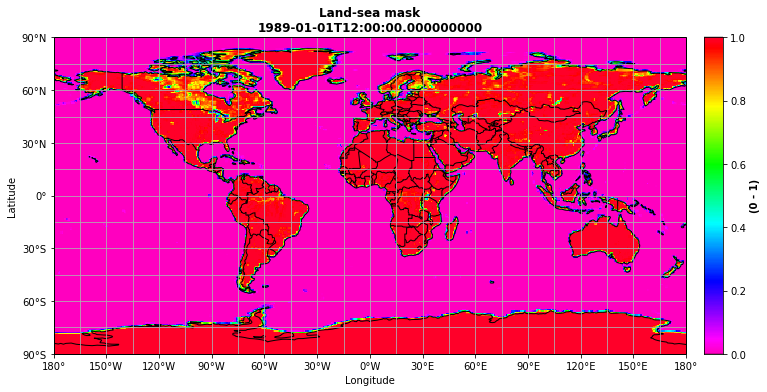

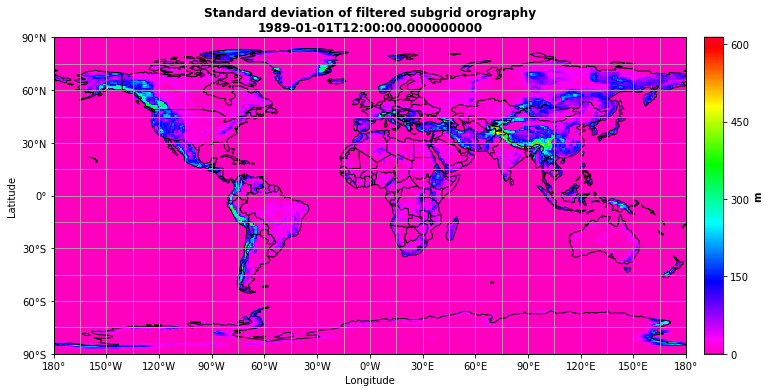

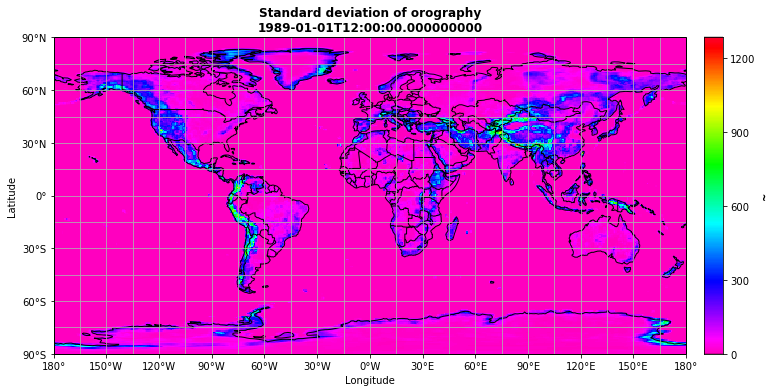

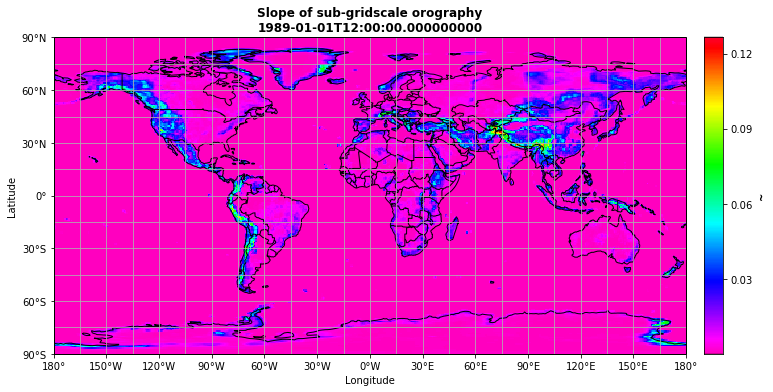

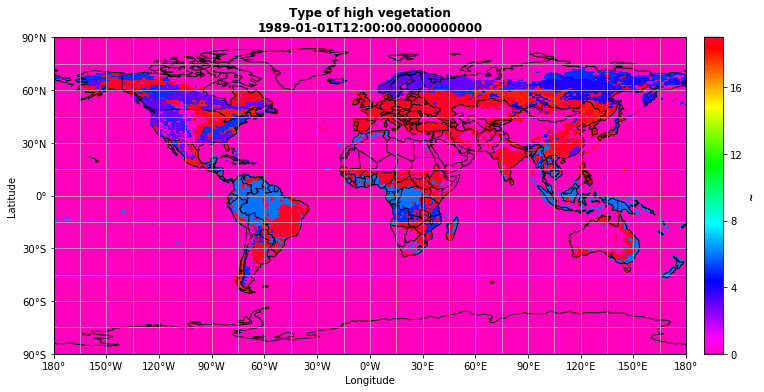

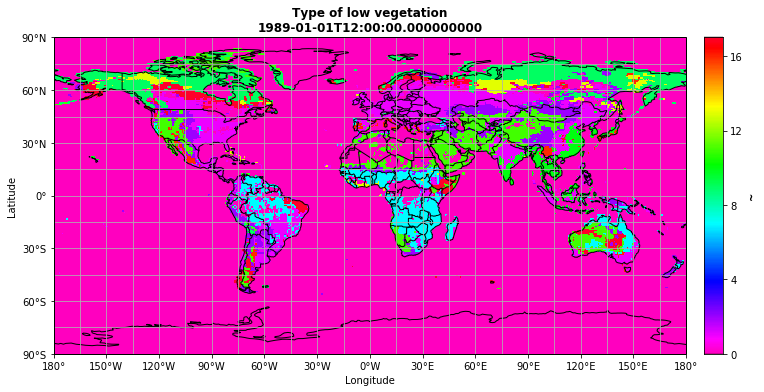

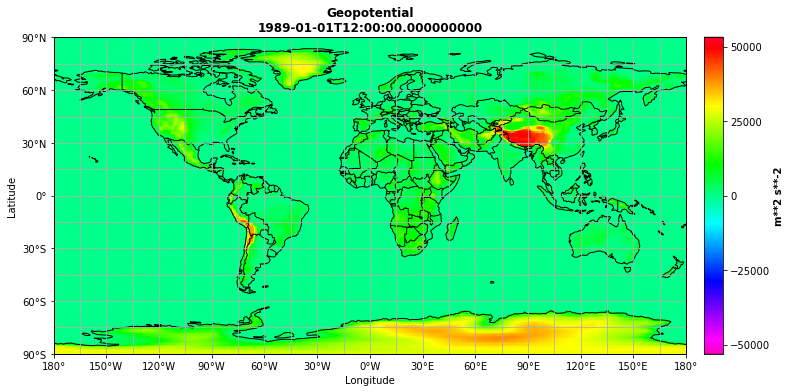

In [112]:
for var_code in grid.var_labels:
    
    data_array = getattr(grid, var_code.lower())
    
    global_map(data_array=data_array,
               title=data_array.attrs["long_name"] + "\n" + str(data_array.time[0].values),
               cbar_label=data_array.attrs["units"]);